# 1-Introducción

## Objetivos
En base al siguiente set de datos: https://www.kaggle.com/c/nlp-getting-started
- Se debe analizar la relación que existe entre la longitud de los tweets, y la veracidad de los mismos. Para esto se espera que analicen las longitudes de los distintos tweets, long máxima, mínima, promedio, y si existe alguna relación entre estos valores y el target (que indica si la información provista en el tweet es real o no).
- Realizar una visualización que permita comunicar los resultados del punto 1.

## Datos conocidos del dataset:
Columnas: 
 - id: Identificador único de cada tweet
 - keyword: Una palabra clave particular de cada tweet (puede ser NaN)
 - location - El lugar donde fue emitido el tweet (puede ser NaN)
 - text: texto del tweet
 - target: Si el tweet trata acerca de un desastre real, el valor es 1, sino 0

## Importación de Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Autorización De Google 

In [ ]:
#Esta autorización nos permitirá trabajar en equipo. 
#Además, utilizaremos PyDrive con Google Drive para poder leer los archivos csv de data proporcionados dentro de COLAB.

!pip install -U -q PyDrive          
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Nos autenticamos y creamos el cliente PyDrive:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2-Preparación de los Datos

## Carga de los datos desde un archivo csv compartido

In [ ]:
#Links compartidos para poder usar el archivo CSV:
linkCSVTrain= 'https://drive.google.com/open?id=1rGxdJGAymaTUnvPCPcfh9_M16pXrMZex'

#Spliteamos para conseguir todo lo que tenga el link después del '=':
fluff, idTrain = linkCSVTrain.split('=')

#Guardamos el Data Set en un Dataframe de Pandas en la variable df_disaster_tweets:
downloaded_train = drive.CreateFile({'id':idTrain}) 
downloaded_train.GetContentFile('train.csv')  

df_disaster_tweets = pd.read_csv('train.csv')

## Estructura del dataframe

In [ ]:
df_disaster_tweets_index = df_disaster_tweets.index
df_disaster_tweets_columns = df_disaster_tweets.columns
df_disaster_tweets_data = df_disaster_tweets.values

In [ ]:
df_disaster_tweets_index

RangeIndex(start=0, stop=7613, step=1)

In [ ]:
df_disaster_tweets_columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
df_disaster_tweets_data

array([[1, nan, nan,
        'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        1],
       [4, nan, nan, 'Forest fire near La Ronge Sask. Canada', 1],
       [5, nan, nan,
        "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
        1],
       ...,
       [10871, nan, nan,
        'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
        1],
       [10872, nan, nan,
        'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
        1],
       [10873, nan, nan,
        'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d',
        1]], dtype=object)

## Exploración de los datos

Primeros datos del dataframe

In [ ]:
df_disaster_tweets.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
df_disaster_tweets.shape #Dimensiones del data frame (rows x columns)

(7613, 5)

In [ ]:
df_disaster_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# 3-Análisis de Keywords

¿Cuales son las keywords con mayor aparicion en los tweets?

Keywords con la mayor cantidad de Tweets

In [ ]:
keywords = df_disaster_tweets.keyword
keywords.value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Gráficos de barra sobre keywords

Text(0.5, 0, 'Palabra Clave')

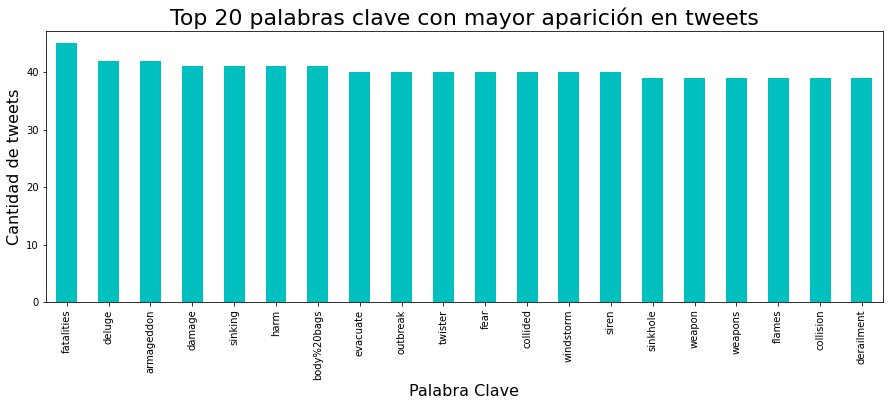

In [ ]:
keywords = df_disaster_tweets.keyword
keywords.value_counts()[:20].plot(kind='bar',figsize=(15,5), color = 'c');
plt.title("Top 20 palabras clave con mayor aparición en tweets", fontsize=22)
plt.ylabel("Cantidad de tweets", fontsize=16)
plt.xlabel("Palabra Clave", fontsize=16)

¿Varia la aparicion de las keywords segun el tipo de noticia (Target)?

Text(0.5, 0, 'Palabra Clave')

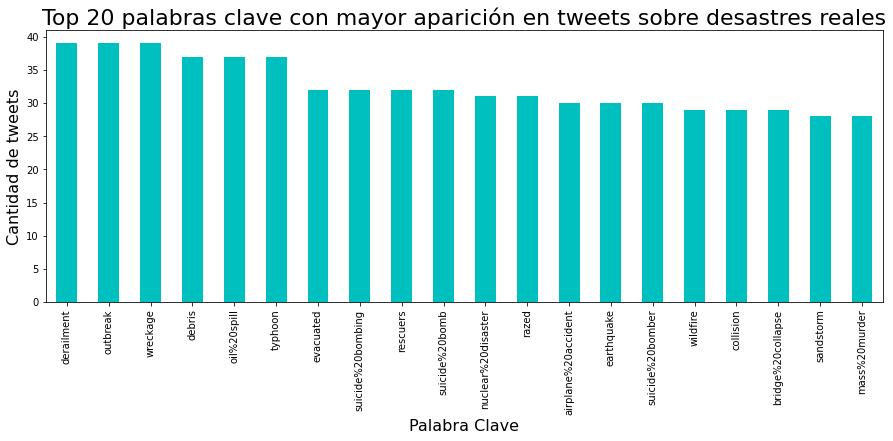

In [ ]:
keywords_targets_true = df_disaster_tweets[df_disaster_tweets.target == 1]['keyword']
keywords_targets_true.value_counts()[:20].plot(kind='bar',figsize=(15,5), color = 'c');
plt.title("Top 20 palabras clave con mayor aparición en tweets sobre desastres reales", fontsize=22)
plt.ylabel("Cantidad de tweets", fontsize=16)
plt.xlabel("Palabra Clave", fontsize=16)

Text(0.5, 0, 'Palabra Clave')

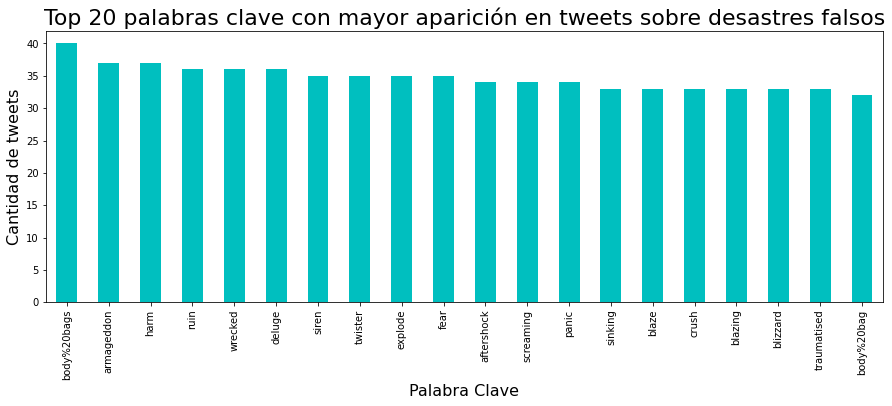

In [ ]:
keywords_targets_false = df_disaster_tweets[df_disaster_tweets.target== 0]['keyword']
keywords_targets_false.value_counts()[:20].plot(kind='bar',figsize=(15,5), color = 'c');
plt.title("Top 20 palabras clave con mayor aparición en tweets sobre desastres falsos", fontsize=22)
plt.ylabel("Cantidad de tweets", fontsize=16)
plt.xlabel("Palabra Clave", fontsize=16)

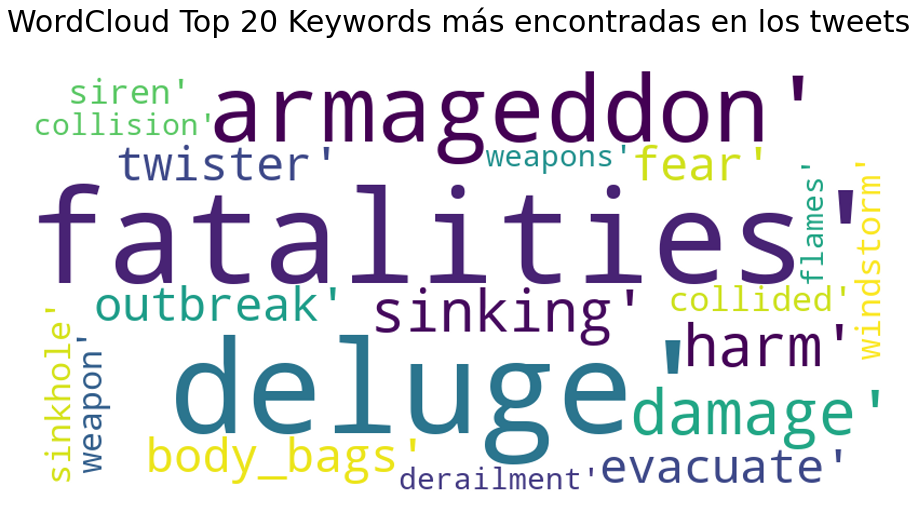

In [ ]:
keywords_counts = keywords.value_counts()[0:20].index
keywors_list = list(keywords_counts)
new_keywords_list = []

#Se realiza el remplazo de '%20' por '_' debido a que esos caracteres separan la
#keyword en dos diferentes.
for string in keywors_list:
    new_string = string.replace("%20", "_")
    new_keywords_list.append(new_string)
 
wordcloud = WordCloud( background_color = 'white', 
                       stopwords = STOPWORDS, 
											 max_words=20, 
											 scale=2,	
											 random_state=1).generate(str(new_keywords_list))
fig = plt.figure(figsize = (12, 8), facecolor = 'w', edgecolor = 'k')
fig.suptitle('WordCloud Top 20 Keywords más encontradas en los tweets', fontsize = 30, color = 'k' )
plt.imshow(wordcloud, interpolation = 'spline16')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Palabras claves que tambien aparecen en el texto del tweet










In [ ]:
listavacia =[]
for x in range(df_disaster_tweets.shape[0]):
    if(df_disaster_tweets['text'][x].find(str(df_disaster_tweets['keyword'][x])) >=0):
        listavacia.append(1)
    else:
        listavacia.append(0)
len(listavacia)

7613

In [ ]:
df_disaster_tweets['keyword_in_text'] = listavacia
df_disaster_tweets_K = df_disaster_tweets['keyword_in_text'].value_counts()
df_disaster_tweets_K


1    3962
0    3651
Name: keyword_in_text, dtype: int64

Text(0.5, 0, 'Palabra Clave')

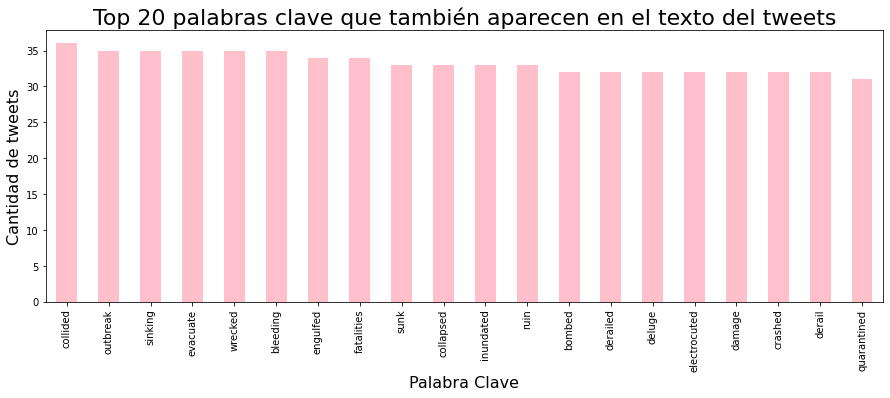

In [ ]:
keywords_K = df_disaster_tweets[df_disaster_tweets['keyword_in_text'] == 1]
keywords_K.keyword.value_counts()[:20].plot(kind='bar',figsize=(15,5), color = 'pink');
plt.title("Top 20 palabras clave que también aparecen en el texto del tweets", fontsize=22)
plt.ylabel("Cantidad de tweets", fontsize=16)
plt.xlabel("Palabra Clave", fontsize=16)


In [ ]:
df_disaster_tweets_keyword_00=df_disaster_tweets[df_disaster_tweets['keyword_in_text'] == 0][['keyword_in_text','target']]
df_disaster_tweets_keyword_00=df_disaster_tweets_keyword_00[df_disaster_tweets_keyword_00['target']==0]['keyword_in_text']
len_00 = len(df_disaster_tweets_keyword_00)

df_disaster_tweets_keyword_01=df_disaster_tweets[df_disaster_tweets['keyword_in_text'] == 0][['keyword_in_text','target']]
df_disaster_tweets_keyword_01=df_disaster_tweets_keyword_01[df_disaster_tweets_keyword_01['target']==1]['keyword_in_text']
len_01 = len(df_disaster_tweets_keyword_01)

df_disaster_tweets_keyword_10=df_disaster_tweets[df_disaster_tweets['keyword_in_text'] == 1][['keyword_in_text','target']]
df_disaster_tweets_keyword_10=df_disaster_tweets_keyword_10[df_disaster_tweets_keyword_10['target']==0]['keyword_in_text']
len_10 = len(df_disaster_tweets_keyword_10)

df_disaster_tweets_keyword_11=df_disaster_tweets[df_disaster_tweets['keyword_in_text'] == 1][['keyword_in_text','target']]
df_disaster_tweets_keyword_11=df_disaster_tweets_keyword_11[df_disaster_tweets_keyword_11['target']==1]['keyword_in_text']
len_11 = len(df_disaster_tweets_keyword_11)

Text(0, 0.5, 'Cantidad de tweets')

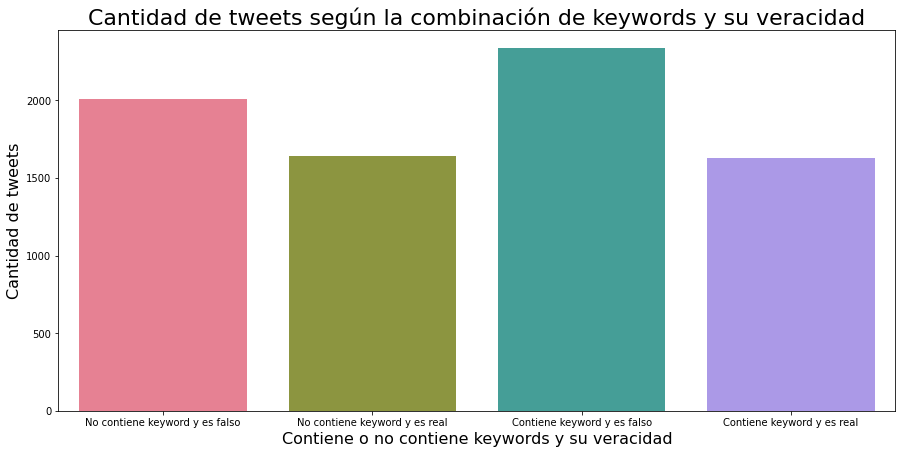

In [ ]:
plt.figure(figsize=(15,7))
g = sns.barplot(x= ['No contiene keyword y es falso','No contiene keyword y es real','Contiene keyword y es falso','Contiene keyword y es real'], y= [len_00,len_01,len_10,len_11], orient='v', palette= 'husl', dodge=False)
g.set_title("Cantidad de tweets según la combinación de keywords y su veracidad", fontsize=22)
g.set_xlabel("Contiene o no contiene keywords y su veracidad", fontsize=16)
g.set_ylabel("Cantidad de tweets", fontsize=16)

# 4-Análisis de Locations y Veracidad de los Tweets 

## Target / Veracidad 

In [ ]:
targets = df_disaster_tweets.target
targets.value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Observación:
Se tiene un set de datos que tiene más tweets que tratan sobre temas no relacionados a desastres. (Un poco más de 1000 tweets de diferencia).

Además, podemos observar que tenemos una gran cantidad de valores para la columna 'location' vacios (tenemos únicamente 5080 NO nulos de los 7613 filas totales). Ocurre algo similar con la columna 'keyword' pero en menores dimensiones (7552 de las 7613).

##Location

¿Cuales son las ubicaciones(Location) con mayor cantidad de tweets?


In [ ]:
count_locations = df_disaster_tweets.location
count_locations.value_counts()

USA               104
New York           71
United States      50
London             45
Canada             29
                 ... 
Harlingen, TX       1
Waukesha, WI        1
Hughes, AR          1
Saint Paul          1
Lake Highlands      1
Name: location, Length: 3341, dtype: int64

[Text(0, 0, 'USA'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'Worldwide'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Chicago, IL'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Everywhere'),
 Text(0, 0, 'California, USA'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'San Francisco'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Washington, D.C.'),
 Text(0, 0, 'Indonesia'),
 Text(0, 0, 'Los Angeles'),
 Text(0, 0, 'NYC'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Toronto'),
 Text(0, 0, 'Earth'),
 Text(0, 0, 'San Francisco, CA')]

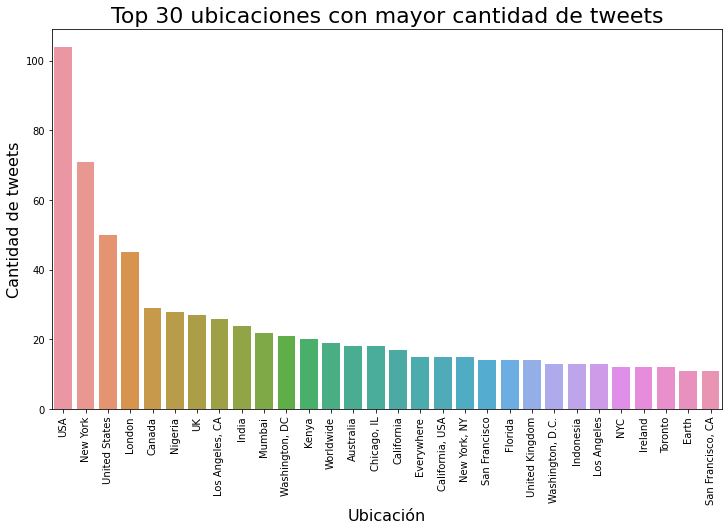

In [ ]:
plt.figure(figsize=(12,7))
g = sns.barplot(x = count_locations.value_counts()[:30].index, y = count_locations.value_counts()[:30].values, orient='v')
g.set_title("Top 30 ubicaciones con mayor cantidad de tweets", fontsize=22)
g.set_xlabel("Ubicación", fontsize=16)
g.set_ylabel("Cantidad de tweets", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

Realizamos este análisis separando las ubicaciones por valor de target

## Locations y Veracidad

#### Location true target

Text(0.5, 0, 'Ubicación')

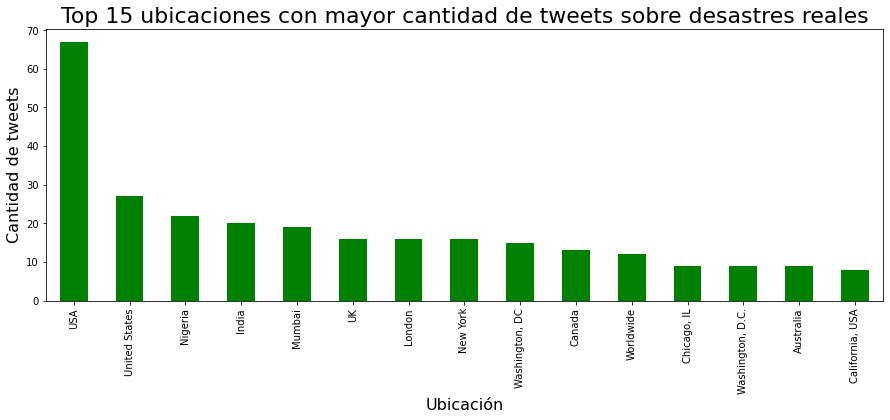

In [ ]:
locations_targets_true = df_disaster_tweets[df_disaster_tweets.target== 1]['location']
locations_targets_true.value_counts()[:15].plot(kind='bar',figsize=(15,5), color = 'g');
plt.title("Top 15 ubicaciones con mayor cantidad de tweets sobre desastres reales", fontsize=22)
plt.ylabel("Cantidad de tweets", fontsize=16)
plt.xlabel("Ubicación", fontsize=16)

#### Location false target

Text(0.5, 0, 'Ubicación')

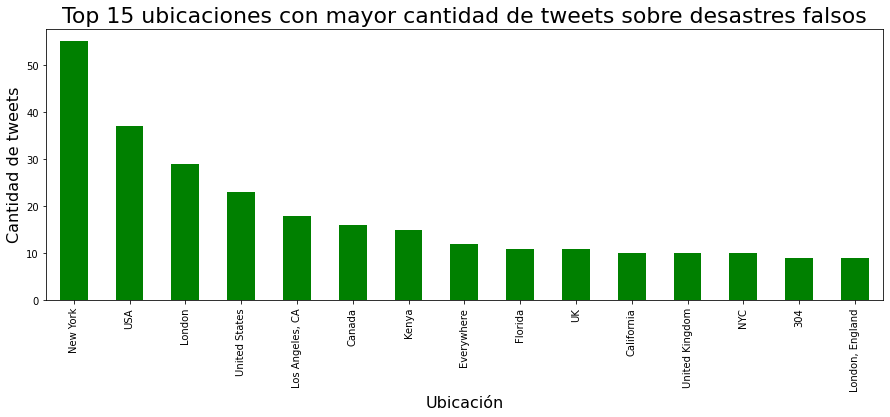

In [ ]:
locations_targets_false = df_disaster_tweets[df_disaster_tweets.target== 0]['location']
locations_targets_false.value_counts()[:15].plot(kind='bar',figsize=(15,5), color = 'g');
plt.title("Top 15 ubicaciones con mayor cantidad de tweets sobre desastres falsos", fontsize=22)
plt.ylabel("Cantidad de tweets", fontsize=16)
plt.xlabel("Ubicación", fontsize=16)

In [ ]:
df_disaster_tweets.loc[df_disaster_tweets.target == 1, 'noticia'] = 'Noticia Real'
df_disaster_tweets.loc[df_disaster_tweets.target == 0, 'noticia'] = 'Noticia Falsa'
df_disaster_tweets

,id,keyword,location,text,target,keyword_in_text,noticia
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,Noticia Real
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,Noticia Real
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,Noticia Real
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,Noticia Real
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,Noticia Real
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,Noticia Real
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,Noticia Real
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,Noticia Real
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,Noticia Real


In [ ]:
tweets_per_location_NY = df_disaster_tweets[df_disaster_tweets.location == 'New York']['noticia']
tweets_per_location_NY.value_counts()

Noticia Falsa    55
Noticia Real     16
Name: noticia, dtype: int64

Text(0, 0.5, 'Cantidad de tweets')

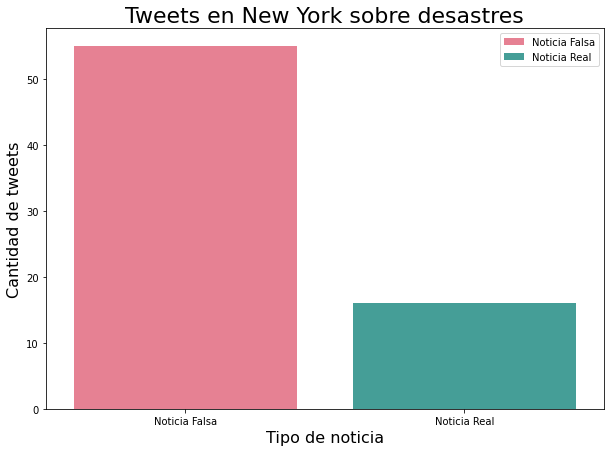

In [ ]:
plt.figure(figsize=(10,7))
g = sns.barplot(x= tweets_per_location_NY.value_counts().index, y= tweets_per_location_NY.value_counts().values, orient='v', palette= 'husl', hue= tweets_per_location_NY.value_counts().index, dodge=False)
g.set_title("Tweets en New York sobre desastres", fontsize=22)
g.set_xlabel("Tipo de noticia", fontsize=16)
g.set_ylabel("Cantidad de tweets", fontsize=16)


In [ ]:
tweets_NY_F = tweets_per_location_NY[tweets_per_location_NY.values == 'Noticia Falsa'].value_counts()
tweets_NY_F

Noticia Falsa    55
Name: noticia, dtype: int64

In [ ]:
tweets_NY =  tweets_NY_F.values * 100 / tweets_per_location_NY.value_counts().sum()
print(str(int(tweets_NY)) + "%")


77%


El 77% de tweets con ubicación 'New York' del dataset son sobre desastres falsos.

# 5-Análisis de Longitudes y Veracidad de los Tweets

## Longitud Tweets

Se agrega la columna lenght que es la longitud de cada tweet. La longitud es la cantidad de caracteres que tiene el texto.

In [ ]:
df_disaster_tweets['length'] = df_disaster_tweets.text.transform(func = lambda x : len(x))
df_disaster_tweets

,id,keyword,location,text,target,keyword_in_text,noticia,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0,Noticia Real,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,Noticia Real,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0,Noticia Real,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0,Noticia Real,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0,Noticia Real,88
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0,Noticia Real,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0,Noticia Real,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0,Noticia Real,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0,Noticia Real,137


In [ ]:
#Longitudes tweets:
df_disaster_tweets.length

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: length, Length: 7613, dtype: int64

###  Media y desvío estandar

In [ ]:
df_disaster_tweets.describe()

,id,target,keyword_in_text,length
count,7613.000000,7613.00000,7613.000000,7613.000000
mean,5441.934848,0.42966,0.520426,101.037436
std,3137.116090,0.49506,0.499615,33.781325
min,1.000000,0.00000,0.000000,7.000000
25%,2734.000000,0.00000,0.000000,78.000000
50%,5408.000000,0.00000,1.000000,107.000000
75%,8146.000000,1.00000,1.000000,133.000000
max,10873.000000,1.00000,1.000000,157.000000


In [ ]:
length_value = df_disaster_tweets.length.value_counts()
length_value

136    401
139    275
138    256
140    218
137    210
      ... 
150      2
151      1
152      1
149      1
157      1
Name: length, Length: 147, dtype: int64

In [ ]:
top5_prom = length_value.values[0:5].sum()*100/length_value.values.sum()
print(str(int(top5_prom)) + "%")

17%


#### Observación:
Haciendo unos primeros cálculos rápidos, se puede observar que los tweets con 136 a 140 caracteres componen el 17% del dataset.

### Gráfico de densidad de la longitud de los tweets

Text(0, 0.5, 'Densidad')

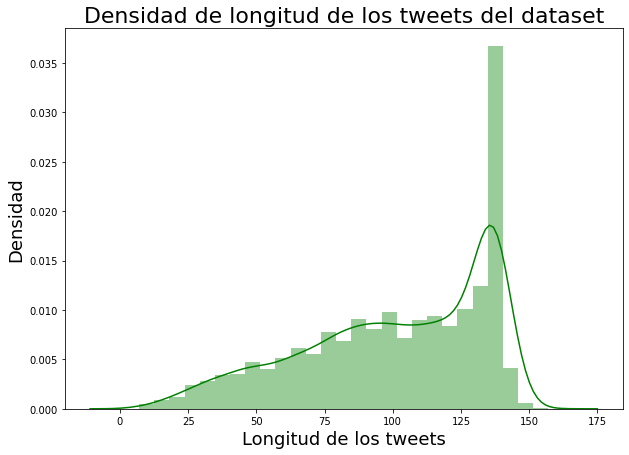

In [ ]:
plt.figure(figsize=(10,7))
g = sns.distplot(df_disaster_tweets.length, hist=True, color = 'g')
g.set_title("Densidad de longitud de los tweets del dataset", fontsize=22)
g.set_xlabel("Longitud de los tweets",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

#### Observación:
En base a la información obtenida de la función describe(), se puede observar que la media de todos los tweets es de 101 caracteres, pero en la función de densidad vemos que hay una gran concentración de tweets que rondan los valores de 125 a 140 caracteres. Además cabe destacar que los tweets con 136 a 140 caracteres, componen el 17% del dataset 

## Target / Veracidad

In [ ]:
#Volvemos a recordar esta simple comparación entre tweets veraces y no veraces.
targets = df_disaster_tweets.target
targets.value_counts()

0    4342
1    3271
Name: target, dtype: int64


## Longitud y Veracidad

In [ ]:
#Analisis estadistico longitudes tweets NO veridicos:
df_disaster_tweets_target0 = df_disaster_tweets[df_disaster_tweets.target == 0]['length'].to_frame()
df_disaster_tweets_target0.describe()

,length
count,4342.000000
mean,95.706817
std,35.885924
min,7.000000
25%,68.000000
50%,101.000000
75%,130.000000
max,157.000000


In [ ]:
#Analisis estadistico longitudes tweets veridicos:
df_disaster_tweets_target1 = df_disaster_tweets[df_disaster_tweets.target == 1]['length'].to_frame()
df_disaster_tweets_target1.describe()

,length
count,3271.000000
mean,108.113421
std,29.309854
min,14.000000
25%,88.000000
50%,115.000000
75%,136.000000
max,151.000000


### Gráfico de Densidad 

Text(0, 0.5, 'Densidad')

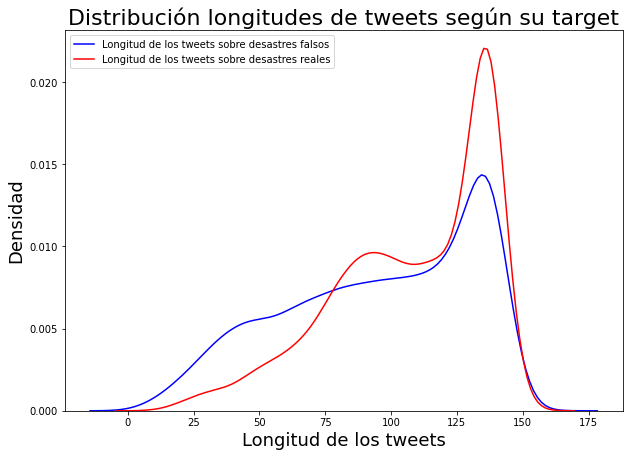

In [ ]:
plt.figure(figsize=(10,7))
density = sns.distplot(df_disaster_tweets_target0, color="blue", label='Longitud de los tweets sobre desastres falsos', hist=False)
density = sns.distplot(df_disaster_tweets_target1, color="red", label='Longitud de los tweets sobre desastres reales', hist=False)
density.set_title("Distribución longitudes de tweets según su target", fontsize=22)
density.set_xlabel("Longitud de los tweets",fontsize=18)
density.set_ylabel("Densidad", fontsize=18)

#### Observación:
Por lo que se puede ver en el gráfico anterior, los tweets que tratan sobre desastres reales tienden a ser mas extensos que los que no tratan sobre ese tema. Además podemos observar que siguen compartiendo el mismo patrón: la mayor densidad de longitud de tweets varía entre los 120 y 140 caracteres.

### Gráfico de BoxPlot

Text(0, 0.5, 'Longitud de los tweets')

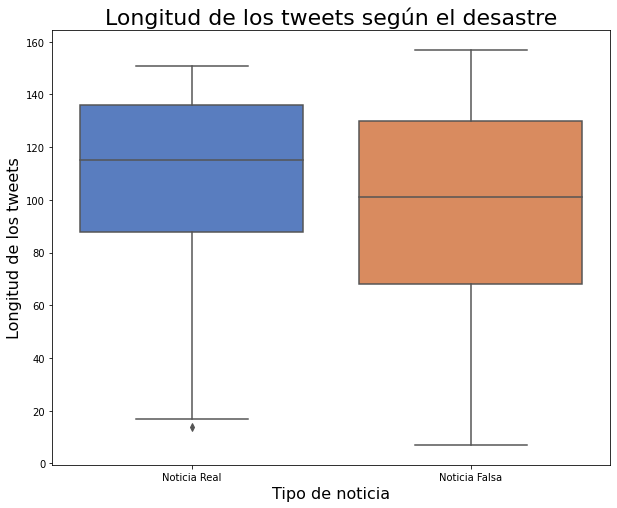

In [ ]:
plt.figure(figsize=(10,8))
box_graphic = sns.boxplot(x='noticia', y='length', 
                     data=df_disaster_tweets, palette='muted')
box_graphic.set_title('Longitud de los tweets según el desastre', fontsize=22)
box_graphic.set_xlabel('Tipo de noticia', fontsize=16)
box_graphic.set_ylabel('Longitud de los tweets', fontsize=16)

Text(0, 0.5, 'Longitud de los tweets')

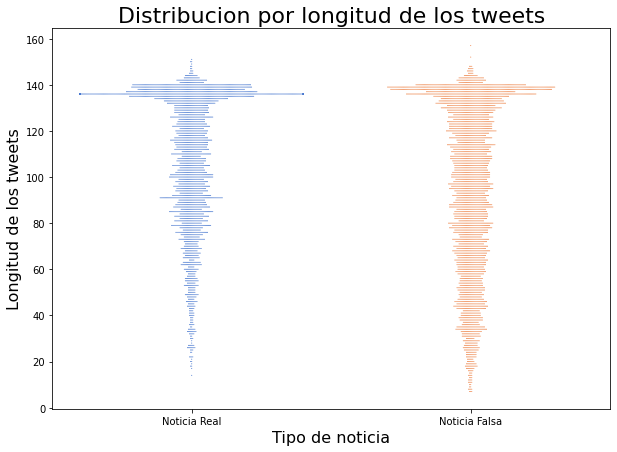

In [ ]:
plt.figure(figsize=(10,7))
swarm = sns.swarmplot(x= 'noticia', y= 'length' , data=df_disaster_tweets, palette = 'muted', size=1)
swarm.set_title("Distribucion por longitud de los tweets", fontsize=22)
swarm.set_xlabel("Tipo de noticia", fontsize=16)
swarm.set_ylabel("Longitud de los tweets", fontsize=16)

#### Observación: 
En el gráfico de boxplot se puede apreciar que los tweets que tratan sobre desastres reales tienen una mayor longitud en comparación con los que tratan sobre no-desastres.

En base al análisis exploratorio de los datos y la comparación entre las longitudes de los tweets sobre casos de desastres y no-desastres se concluye que:
- Si bien hay menos datos de tweets de desastres a comparación de los de no-desastres, hay una clara tendencia a escribir tweets mas extensos cuando se habla sobre desastres.
- Si bien la media es un dato estadístico importante, gracias a las visualizaciones se pudo procesar la información de una forma mas eficiente. Esto es debido a que se pudo observar que hay una concentración muy grande de tweets que tienen como longitud entre 125 y 140 caracteres, donde estos son valores más grandes que la media.